# Tutorial focuses on creating the 5 most common plot types we saw in LP/AP dashboards: Pie charts, Bar charts, Scatter plots, Line plots, and Heat maps. Customizations for each of these plot types are discussed.

# Pie Chart - Theft Incident Distribution by Category
## Scenario: Visualizing the proportion of different theft categories.
## Customizations: Colors, explode effect, shadow, percentage labels.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 1. Pie Chart Data - Theft Categories
theft_categories = ['Shoplifting', 'Employee Theft', 'Organized Retail Crime', 'Fraud', 'Burglary']
theft_counts = [320, 150, 220, 180, 130]

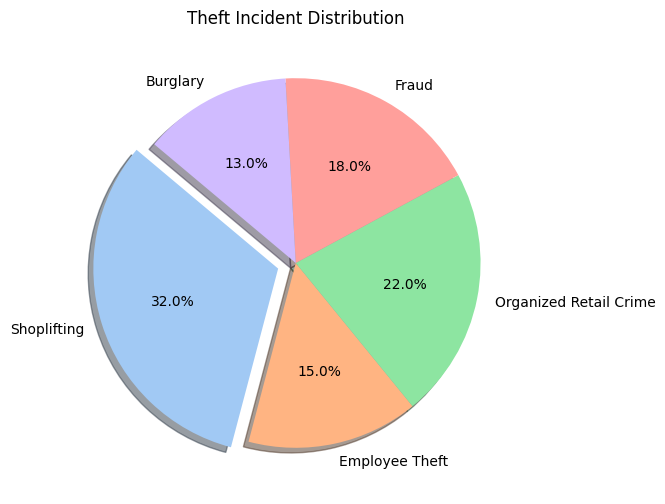

In [44]:
# 1. Pie Chart - Theft Incident Distribution
plt.figure(figsize=(6, 6))
explode = (0.1, 0, 0, 0, 0)  # Explode first slice
plt.pie(theft_counts, labels=theft_categories, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("pastel"), shadow=True, explode=explode)
plt.title("Theft Incident Distribution")
plt.show()

# Bar Chart - Monthly Fraud Cases
## Scenario: Fraud incidents reported per month.
## Customizations: Custom bar colors, edge styles, tick mark rotations, and text annotations.

In [45]:
# 2. Bar Chart Data - Fraud Cases by Month
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
fraud_cases = np.random.randint(50, 200, size=12)

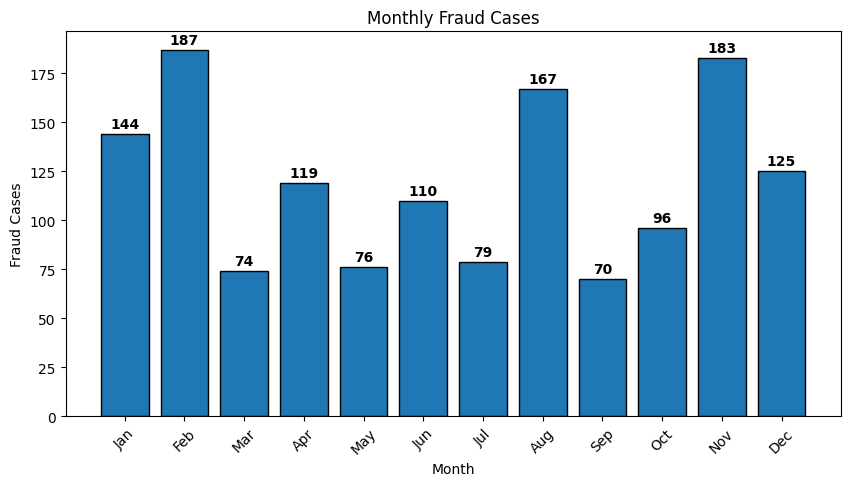

In [46]:
# 2. Bar Chart - Fraud Cases per Month
plt.figure(figsize=(10, 5))
# color=sns.color_palette("coolwarm", 12)
plt.bar(months, fraud_cases, edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Fraud Cases")
plt.title("Monthly Fraud Cases")
plt.xticks(rotation=45)
for i, val in enumerate(fraud_cases):
    plt.text(i, val + 3, str(val), ha='center', fontsize=10, fontweight='bold')
plt.show()

# Scatter Plot - Incident Severity vs. Response Time
## Scenario: Relationship between theft severity and police response time.
## Customizations: Colored points, marker size variation, regression trend.

In [29]:
import pandas as pd

# Load Excel file
severity_data = pd.read_excel("data/incident_severity_vs_response.xlsx")

# Display DataFrame
print(severity_data.head())

   Incident Severity  Response Time (minutes)
0                  7                 9.792329
1                  4                 6.579345
2                  8                14.315517
3                  5                29.116491
4                  7                15.654490


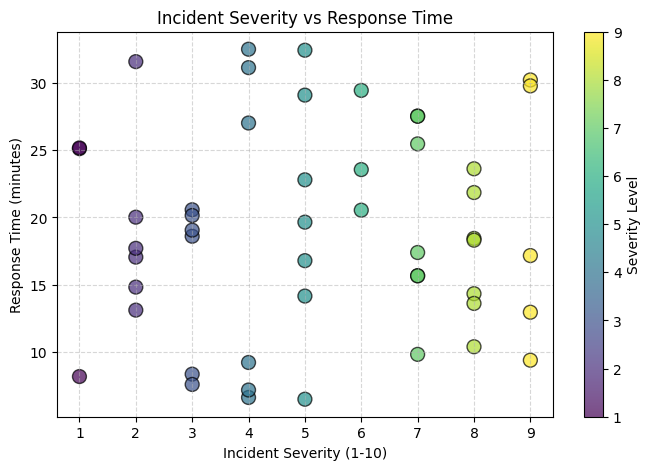

In [30]:
# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(severity_data["Incident Severity"], severity_data["Response Time (minutes)"], 
            c=severity_data["Incident Severity"], cmap='viridis', s=100, alpha=0.7, edgecolors='black')

plt.colorbar(label="Severity Level")
plt.xlabel("Incident Severity (1-10)")
plt.ylabel("Response Time (minutes)")
plt.title("Incident Severity vs Response Time")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Line Plot - Monthly Loss Value Trend
## Scenario: Tracking financial loss over months.
## Customizations: Line styles, grid, labels, and dual-axis.

In [31]:
# Load CSV value
loss_data = pd.read_csv("data/monthly_loss_trend.csv")

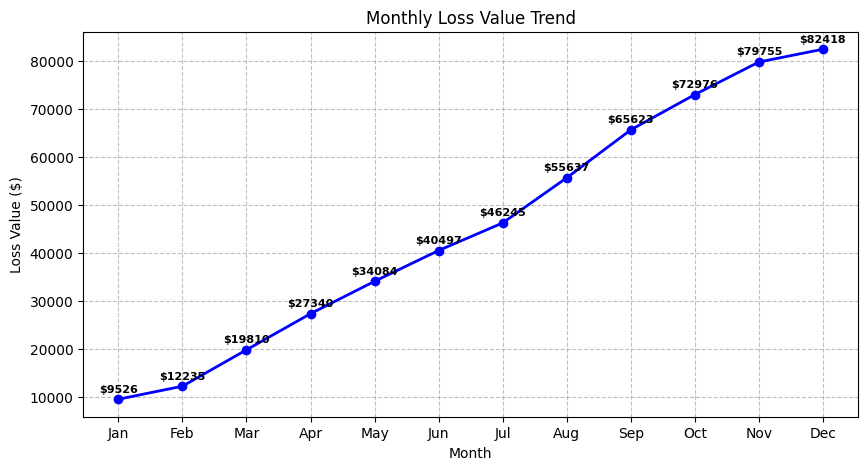

In [32]:
# Line Plot
plt.figure(figsize=(10, 5))
plt.plot(loss_data["Month"], loss_data["Loss Value"], marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
plt.xlabel("Month")
plt.ylabel("Loss Value ($)")
plt.title("Monthly Loss Value Trend")
plt.grid(True, linestyle="--", alpha=0.8)

# Annotate values
for i, val in enumerate(loss_data["Loss Value"]):
    plt.text(i, val + 1500, f"${val}", ha='center', fontsize=8, fontweight='bold')

plt.show()

# Heatmap - Store Incident Density by Hour and Weekday
## Scenario: When theft incidents occur most frequently.
## Customizations: Heatmap with a colormap, value annotations.

In [33]:
# Load dataset
heatmap_data = pd.read_excel("data/incident_density_heatmap.xlsx", index_col=0)
#print(heatmap_data.head(7))

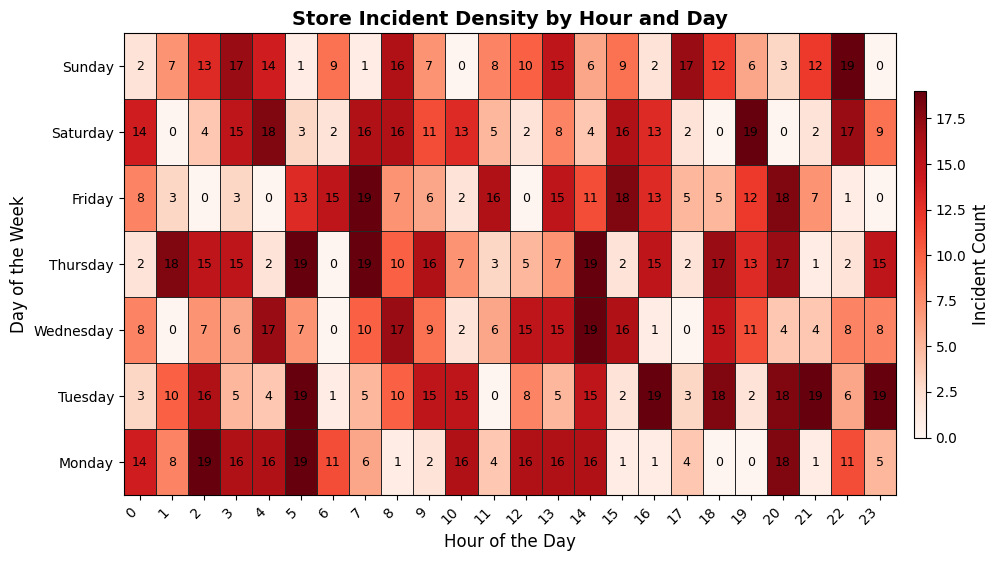

In [40]:
# Custom Heatmap with Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Define a colormap and normalize the color scale
cmap = plt.cm.Reds  # Choose a color map, e.g., Reds, Blues, Viridis, etc.
norm = mcolors.Normalize(vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())

# Create heatmap using pcolormesh
cbar = ax.pcolormesh(heatmap_data, cmap=cmap, norm=norm, edgecolors='gray', linewidth=0.5)

# Add colorbar with customization
cbar_ax = fig.colorbar(cbar, ax=ax, shrink=0.75, aspect=30, pad=0.02)
cbar_ax.set_label("Incident Count", fontsize=12)

# Customizing ticks and labels
ax.set_xticks(np.arange(heatmap_data.shape[1]) + 0.5)  # Center ticks on cells
ax.set_yticks(np.arange(heatmap_data.shape[0]) + 0.5)
ax.set_xticklabels(heatmap_data.columns, rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(heatmap_data.index, fontsize=10)

# Adding gridlines to separate cells
ax.set_xticks(np.arange(heatmap_data.shape[1]), minor=True)
ax.set_yticks(np.arange(heatmap_data.shape[0]), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", size=0)

# Title and labels
ax.set_xlabel("Hour of the Day", fontsize=12)
ax.set_ylabel("Day of the Week", fontsize=12)
ax.set_title("Store Incident Density by Hour and Day", fontsize=14, fontweight="bold")

# Annotate cells with data values
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        ax.text(j + 0.5, i + 0.5, f"{heatmap_data.iloc[i, j]}", ha='center', va='center', color="black", fontsize=9)

plt.show()